# 3) Target Features Processing

In this notebook, we will try to design a pool of features that may be used as input for our predictive model. Some popular features may include technical indicators (see [here](https://medium.com/@harrynicholls/7-popular-technical-indicators-and-how-to-use-them-to-increase-your-trading-profits-7f13ffeb8d05)), the MACD indicator we just used as a benchmark, volume indicators, periodic price changes, rolling price variance, ... etc. It will always be a better idea to include as many features as possible in the initial stage so that we will have more options in the features screening stage.

After creating a pool of features, we have a number of ways to decide which features to be chosen for the model inputs. For simplicity, we will compute correlation matrix to pick features which have the least correlation with each other.


### Data Reading

First of all, read all existing csv files in `input_data/`

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from data_reader import *
pd.options.display.max_columns = None


df = read_all_csvs()

Reading in progress: [==================================================] 100.0%
Finished reading 363 csv files and 517731 entries found


In [3]:
df.head()

,date_time,open,high,low,close,volume
0,2020-01-01 00:00:00,7195.00,7200.25,7186.77,7200.25,57.777035
1,2020-01-01 00:01:00,7200.25,7220.37,7200.22,7217.70,76.136927
2,2020-01-01 00:02:00,7217.70,7220.81,7211.32,7215.01,41.826715
3,2020-01-01 00:03:00,7215.06,7221.99,7214.42,7217.57,18.940854
4,2020-01-01 00:04:00,7217.58,7218.98,7209.04,7211.65,39.764474


### Features Computation

The below cells will list out the features to be computed and their formula.

`features_helper.py` is a script that stores some helper functions for computing various features.

```{python}
class FeaturesHelper:
    def __init__(self, input_df):
        assert all([i in input_df.columns for i in ['date_time', 'open', 'high', 'low', 'close', 'volume']]) 
        self.res_df = input_df             # For returning a dataframe with all accumulated features
        self.computed_features = []        # Storing string name of all features computed
        self.tmp_df = self.res_df.copy()
        self.raw_df = self.res_df.copy()
```

In [4]:
from features_helper import FeaturesHelper

helper = FeaturesHelper(df)

We can get a list of available features using the class method `get_available_features`

In [5]:
all_features = helper.get_available_features()

Then we can compute all features using the class method `run_features_list`

In [6]:
helper.run_features_list(all_features, log=True)

Computed 15m_chg_std               ; used 0.098s
Computed 15m_draw_down             ; used 0.061s
Computed 15m_draw_up               ; used 0.052s
Computed 15m_price_chg             ; used 0.033s
Computed 15m_z_price               ; used 0.082s
Computed 15m_z_volume              ; used 0.085s
Computed 1m_price_chg              ; used 0.053s
Computed 5m_smoothed_volume_chg    ; used 0.095s
Computed 60m_chg_std               ; used 0.084s
Computed 60m_draw_down             ; used 0.087s
Computed 60m_draw_up               ; used 0.089s
Computed 60m_price_chg             ; used 0.072s
Computed 60m_z_price               ; used 0.118s
Computed 60m_z_volume              ; used 0.118s
Computed adx                       ; used 1.246s
Computed close_to_high             ; used 0.083s
Computed close_to_low              ; used 0.088s
Computed close_to_open             ; used 0.092s
Computed fso                       ; used 0.446s
Computed log_volume                ; used 0.116s
Computed macd       

And get the result dataframe by `get_result`

In [7]:
result_df = helper.get_result(bool_dropna=True)

In [8]:
result_df[all_features]

,15m_chg_std,15m_draw_down,15m_draw_up,15m_price_chg,15m_z_price,15m_z_volume,1m_price_chg,5m_smoothed_volume_chg,60m_chg_std,60m_draw_down,60m_draw_up,60m_price_chg,60m_z_price,60m_z_volume,adx,close_to_high,close_to_low,close_to_open,fso,log_volume,macd,obv,rsi,sso,volume_chg
0,0.000376,-12.688246,2.510991,-5.724781,-1.816044,-0.501095,-1.899746,0.442304,0.000704,-21.451446,13.749580,13.707857,-1.123762,-0.634879,35.520157,-3.244385,1.692353,-3.230525,-33.500456,1.998947,-0.552226,14.729818,-6.830672,-17.061683,-0.593879
1,0.000383,-16.760674,3.567160,-11.461517,-2.205326,0.520076,-4.077602,0.033968,0.000631,-25.520301,7.720485,-14.575280,-1.679798,-0.097864,37.040723,-3.911234,3.567160,-3.911234,-32.481254,2.612076,-0.789266,1.102508,-12.943865,-28.997854,0.846199
2,0.000382,-17.467116,2.859280,-11.766891,-1.877449,-0.690663,-0.707628,0.008016,0.000630,-26.226123,7.012311,-11.559236,-1.712799,-0.722088,38.071884,-1.845172,1.609879,-1.650975,-35.957737,1.942744,-0.921642,-5.875362,-13.198074,-33.979816,-0.487950
3,0.000351,-19.073924,1.249200,-18.106054,-1.826281,-0.120909,-1.609620,0.043619,0.000628,-27.831522,5.401562,-16.709225,-1.856050,-0.406542,39.261958,-4.397476,0.000000,-1.137888,-43.865031,2.295279,-1.020602,-15.802565,-21.857694,-37.434674,0.422670
4,0.000284,-18.093504,1.318703,-10.163151,-1.634289,0.190812,-0.707792,0.080779,0.000620,-28.537344,4.693388,-9.221191,-1.882046,-0.149173,40.955101,-1.720731,1.318703,-0.707792,-43.219129,2.491547,-1.049918,-27.882509,-15.175392,-41.013966,0.216853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517666,0.000966,-21.107407,42.816982,40.070086,0.376228,2.078943,-7.632515,0.258406,0.001685,-31.747594,128.951128,14.577872,1.057998,0.234962,52.076000,-9.940741,16.014912,-7.109959,16.839288,4.604367,5.115168,-282819.805420,19.544072,30.425002,0.951167
517667,0.000965,-24.322222,34.023768,28.796972,0.051091,-0.518000,-3.221615,0.244544,0.001684,-34.958981,125.687970,16.396284,0.954817,-0.633874,51.149409,-3.711356,10.324624,-3.329214,8.171975,3.848640,1.391930,-282866.734625,14.751922,18.546363,-0.530331
517668,0.000975,-28.951852,26.752328,19.289170,-0.426749,-0.230679,-4.640917,0.286174,0.001677,-39.583674,120.988722,23.769463,0.810353,-0.535997,49.379733,-4.637206,8.115242,-4.637206,-2.113333,3.952278,-2.185655,-282918.788435,9.918063,7.632643,0.109199
517669,0.001013,-38.281481,13.641102,10.242241,-1.389723,0.777071,-9.356719,0.105790,0.001634,-48.903356,111.518797,-16.406318,0.562669,-0.151573,46.370216,-11.564266,13.641102,-9.356719,-23.828571,4.312129,-6.289268,-282993.387613,4.839076,-5.923310,0.433117


The above dataframe is the input features that we have computed. Now we can look into its correlation to decide which features to pick.

In [9]:
corr_df = result_df[all_features].corr().abs()
display(corr_df)

,15m_chg_std,15m_draw_down,15m_draw_up,15m_price_chg,15m_z_price,15m_z_volume,1m_price_chg,5m_smoothed_volume_chg,60m_chg_std,60m_draw_down,60m_draw_up,60m_price_chg,60m_z_price,60m_z_volume,adx,close_to_high,close_to_low,close_to_open,fso,log_volume,macd,obv,rsi,sso,volume_chg
15m_chg_std,1.000000,0.738670,0.762191,0.061072,0.007500,0.027184,0.005264,0.002126,0.856037,0.732379,0.665371,0.140676,0.044598,0.058393,0.171545,0.602022,0.603097,0.005142,0.002706,0.491433,0.004159,0.072434,0.021436,0.001323,0.007515
15m_draw_down,0.738670,1.000000,0.282457,0.564559,0.387748,0.021887,0.255018,0.034847,0.624537,0.782966,0.293367,0.324531,0.338358,0.108433,0.188586,0.669437,0.387743,0.254682,0.393662,0.414904,0.462144,0.056627,0.370889,0.377447,0.007512
15m_draw_up,0.762191,0.282457,1.000000,0.425136,0.352611,0.000328,0.249445,0.008194,0.666899,0.375261,0.748594,0.095277,0.247307,0.086037,0.191675,0.331912,0.618018,0.249091,0.386609,0.425293,0.407120,0.041111,0.320283,0.364801,0.007386
15m_price_chg,0.061072,0.564559,0.425136,1.000000,0.485476,0.006923,0.257284,0.023584,0.006673,0.421987,0.371807,0.482784,0.544184,0.015116,0.030960,0.214183,0.067954,0.256168,0.487076,0.012320,0.649421,0.005010,0.651761,0.518774,0.009354
15m_z_price,0.007500,0.387748,0.352611,0.485476,1.000000,0.004305,0.347875,0.014361,0.001600,0.236937,0.222144,0.225054,0.673802,0.007193,0.009652,0.216139,0.139395,0.347944,0.931126,0.000175,0.543519,0.003252,0.753641,0.835012,0.011414
15m_z_volume,0.027184,0.021887,0.000328,0.006923,0.004305,1.000000,0.021838,0.332999,0.030537,0.019096,0.028175,0.001659,0.000257,0.822873,0.003036,0.189172,0.195118,0.021744,0.003904,0.560651,0.013217,0.001656,0.003930,0.000151,0.493924
1m_price_chg,0.005264,0.255018,0.249445,0.257284,0.347875,0.021838,1.000000,0.012034,0.006085,0.137882,0.137246,0.127978,0.207738,0.027458,0.000684,0.547636,0.492284,0.996890,0.299332,0.013632,0.155686,0.001279,0.184478,0.099993,0.028587
5m_smoothed_volume_chg,0.002126,0.034847,0.008194,0.023584,0.014361,0.332999,0.012034,1.000000,0.036087,0.010126,0.033143,0.013186,0.022167,0.374121,0.040446,0.103874,0.109386,0.011867,0.006939,0.216830,0.024596,0.036390,0.017481,0.010202,0.431557
60m_chg_std,0.856037,0.624537,0.666899,0.006673,0.001600,0.030537,0.006085,0.036087,1.000000,0.766206,0.778354,0.097543,0.022041,0.029166,0.079856,0.540229,0.539879,0.006512,0.008258,0.460873,0.028764,0.080127,0.001858,0.008018,0.016269
60m_draw_down,0.732379,0.782966,0.375261,0.421987,0.236937,0.019096,0.137882,0.010126,0.766206,1.000000,0.310529,0.570780,0.393457,0.016171,0.162936,0.563359,0.411755,0.137314,0.217149,0.394688,0.139003,0.061087,0.275142,0.224027,0.006669


However, looking at a bunch of numbers is not the ideal way to visualize the table. We may use seaborn's heatmap to help understand the correlation structure.

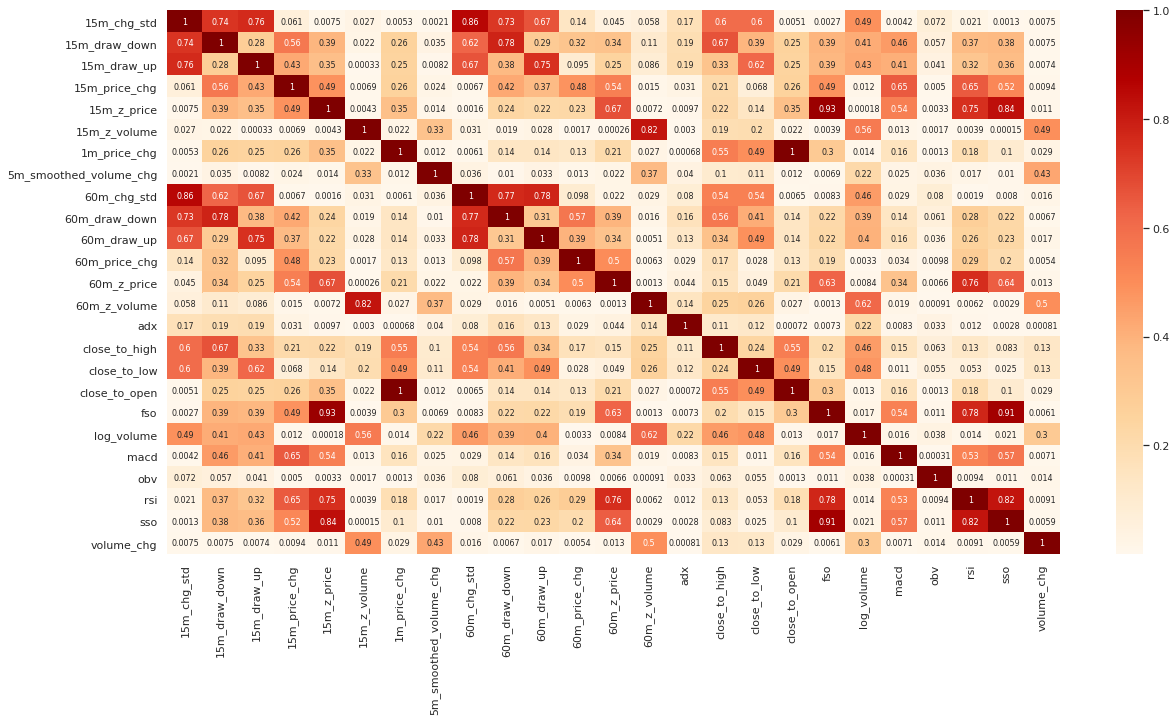

In [10]:
import seaborn as sns

sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(corr_df, annot=True, annot_kws={"fontsize": 8}, cmap='OrRd')

From the heatmap above, we can infer some information about the correlation structurn among the features and screen out some features that are redundant. For instance:

> `15m_*` features are highly correlated with `60m_*` features, as expected <br>
> `soi` is highly correlated with `foi` as it is simply a 3-period moving average of `foi` <br>
> `foi` has a very similar formula with `15m_z_price` so they have a 0.84 correlation ...  etc

(Features formula are provided in `Ext_features_formula.ipynb`)

Therefore, we can use these observations to decide which features to use. The full list of features used will be listed in the next notebook, `4_target_model_training`

---